# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [163]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [164]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

city                 date   fare        ride_id  \
0  Lake Jonathanshire  2019-01-14 10:14:22  13.83  5739410935873   
1  South Michelleport  2019-03-04 18:24:09  30.24  2343912425577   
2  Port Samanthamouth  2019-02-24 04:29:00  33.44  2005065760003   
3          Rodneyfort  2019-02-10 23:22:03  23.44  5149245426178   
4          South Jack  2019-03-06 04:28:35  34.58  3908451377344   

   driver_count   type  
0             5  Urban  
1            72  Urban  
2            57  Urban  
3            34  Urban  
4            46  Urban

## Deliverable 1: Get a Summary DataFrame 

In [165]:
#  1. Get the total rides for each city type

rides_by_city = pyber_data_df.groupby(["type"]).count()["ride_id"]


In [166]:
# 2. Get the total drivers for each city type

#use the groupby() function to create a Series of data that has the 
#type of city as the index, then apply the sum() method to the "driver_count" column.

driver_by_city = city_data_df.groupby(["type"]).sum()["driver_count"]
driver_by_city

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [167]:
#  3. Get the total amount of fares for each city type
#same thing but look at fares

city_fare = pyber_data_df.groupby(["type"]).sum()["fare"]

In [168]:
#  4. Get the average fare per ride for each city type. 
#calculate the average fare per ride by city type by dividing the sum of all the fares by the total rides.
avg_fare = pyber_data_df.groupby(["type"]).mean()["fare"]

In [169]:
avg_driver_fare = city_fare / driver_by_city

In [170]:
#  6. Create a PyBer summary DataFrame. 
#create a PyBer summary DataFrame with all the data gathered from Steps 1-5,

pyber_summary_df = pd.DataFrame(
          {"Total Rides": rides_by_city,
            "Total Drivers": driver_by_city,
            "City Fare": city_fare,
            "Average City Fare": avg_fare,
            "Average Driver Fare": avg_driver_fare})

pyber_data_df

city                 date   fare        ride_id  \
0     Lake Jonathanshire  2019-01-14 10:14:22  13.83  5739410935873   
1     South Michelleport  2019-03-04 18:24:09  30.24  2343912425577   
2     Port Samanthamouth  2019-02-24 04:29:00  33.44  2005065760003   
3             Rodneyfort  2019-02-10 23:22:03  23.44  5149245426178   
4             South Jack  2019-03-06 04:28:35  34.58  3908451377344   
...                  ...                  ...    ...            ...   
2370         Michaelberg  2019-04-29 17:04:39  13.38  8550365057598   
2371     Lake Latoyabury  2019-01-30 00:05:47  20.76  9018727594352   
2372         North Jaime  2019-02-10 21:03:50  11.11  2781339863778   
2373        West Heather  2019-05-07 19:22:15  44.94  4256853490277   
2374          Newtonview  2019-04-25 10:20:13  55.84  9990581345298   

      driver_count   type  
0                5  Urban  
1               72  Urban  
2               57  Urban  
3               34  Urban  
4               46  Urban  
...            ...    ...  
2370             6  Rural  
2371             2  Rural  
2372             1  Rural  
2373             4  Rural  
2374             1  Rural  

[2375 rows x 6 columns]

In [171]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None

In [172]:
#  8. Format the columns.
pyber_summary_df["Total Rides"] = pyber_summary_df["Total Rides"].map("{:,}".format)
pyber_summary_df["Total Drivers"] = pyber_summary_df["Total Drivers"].map("{:,}".format)
pyber_summary_df["City Fare"] = pyber_summary_df["City Fare"].map("${:,.2f}".format)
pyber_summary_df["Average City Fare"] = pyber_summary_df["Average City Fare"].map("${:,.2f}".format)
pyber_summary_df["Average Driver Fare"] = pyber_summary_df["Average Driver Fare"].map("${:,.2f}".format)

In [173]:
pyber_summary_df

Total Rides Total Drivers   City Fare Average City Fare  \
Rural            125            78   $4,327.93            $34.62   
Suburban         625           490  $19,356.33            $30.97   
Urban          1,625         2,405  $39,854.38            $24.53   

         Average Driver Fare  
Rural                 $55.49  
Suburban              $39.50  
Urban                 $16.57

## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [180]:
# 1. Read the merged DataFrame

pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

In [181]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.

new_city_df = pyber_data_df.groupby(["type", "date"]).sum()["fare"]

In [182]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
# df = df.reset_index()


new_city_df = new_city_df.reset_index()

In [186]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 

new_city_pivot = new_city_df.pivot(index="date", columns="type", values="fare")


In [187]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.

tripcounts_Jan_April = new_city_pivot.loc['2019-01-01':'2019-04-29']


In [190]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
tripcounts_Jan_April.index = pd.to_datetime(tripcounts_Jan_April.index)


In [191]:
# 7. Check that the datatype for the index is datetime using df.info()
tripcounts_Jan_April.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2196 entries, 2019-01-01 00:08:16 to 2019-04-28 19:35:03
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     114 non-null    float64
 1   Suburban  573 non-null    float64
 2   Urban     1509 non-null   float64
dtypes: float64(3)
memory usage: 68.6 KB


In [197]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
weekly_rides_df = tripcounts_Jan_April.resample('W').sum()
weekly_rides_df.head(10)

type         Rural  Suburban    Urban
date                                 
2019-01-06  187.92    721.60  1661.68
2019-01-13   67.65   1105.13  2050.43
2019-01-20  306.00   1218.20  1939.02
2019-01-27  179.69   1203.28  2129.51
2019-02-03  333.08   1042.79  2086.94
2019-02-10  115.80    974.34  2162.64
2019-02-17   95.82   1045.50  2235.07
2019-02-24  419.06   1412.74  2466.29
2019-03-03  175.14    858.46  2218.20
2019-03-10  303.94    925.27  2470.93

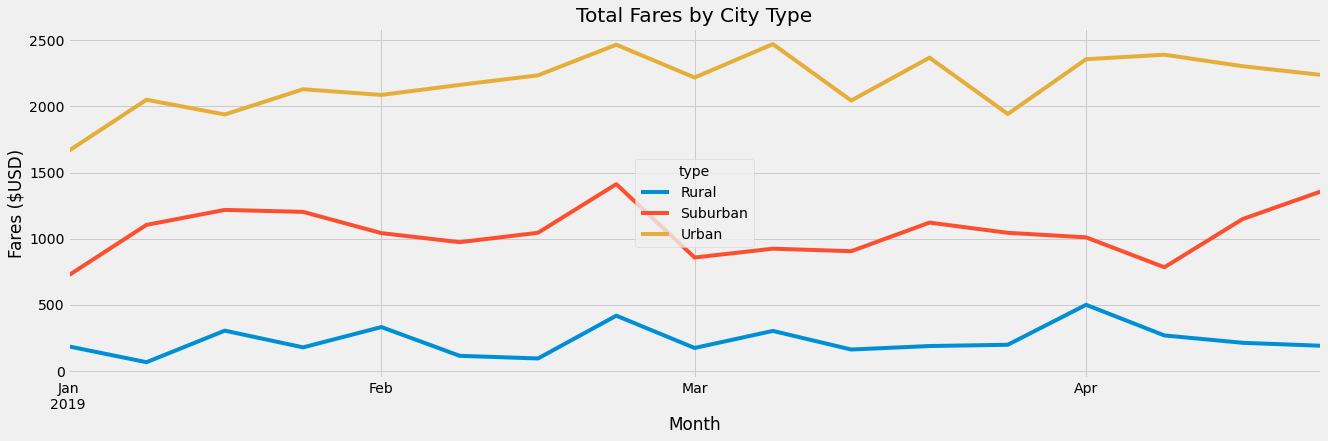

<Figure size 432x288 with 0 Axes>

In [199]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 

# Import the style from Matplotlib.
from matplotlib import style

# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')

weekly_rides = weekly_rides_df.plot(figsize = (20,6))
# Add a title 
weekly_rides.set_title("Total Fares by City Type")
#  Add a x- and y-axis label.
weekly_rides.set_xlabel("Month")
weekly_rides.set_ylabel("Fares ($USD)")

plt.show()
plt.tight_layout()
